In [1]:
# Suppress any warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries for data manipulation, visualization, and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Load the apple quality dataset 
Data = pd.read_csv("D:/machine learning/APPle Quality/apple_quality.csv")

In [4]:
# Display the first few rows of the dataset 
Data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
# Check the dimensions of the dataset
Data.shape

(4001, 9)

In [6]:
# Display a summary of the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
# Provide a statistical summary of the dataset
Data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [8]:
# Check for missing values in each column
Data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [9]:
# Check for duplicate rows in the dataset
Data.duplicated().sum()

0

In [10]:
# Drop duplicate rows if any exist
Data.dropna(inplace = True)

In [11]:
# Verify that there are no remaining missing values after cleaning
Data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [12]:
# Convert the 'Acidity' column to float type for consistency
Data['Acidity'] = Data['Acidity'].astype(float)

In [13]:
# Map the 'Quality' column values to binary: 'good' to 1 and 'bad' to 0
Data['Quality'] = Data['Quality'].map({'good':1, 'bad':0})

In [14]:
# Display the first few rows of the cleaned and modified dataset
Data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [15]:
# Calculate and display the correlation matrix
Data.corr()['Quality']

A_id           0.004875
Size           0.244007
Weight         0.001421
Sweetness      0.250998
Crunchiness   -0.012376
Juiciness      0.260223
Ripeness      -0.264315
Acidity       -0.007697
Quality        1.000000
Name: Quality, dtype: float64

In [16]:
# Drop the column 'A_id' as it may not be relevant for analysis
Data.drop(columns=['A_id'], inplace=True)

In [17]:
# Display the first few rows after dropping unnecessary columns
Data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [18]:
# Display dataset information again to confirm the changes made to columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


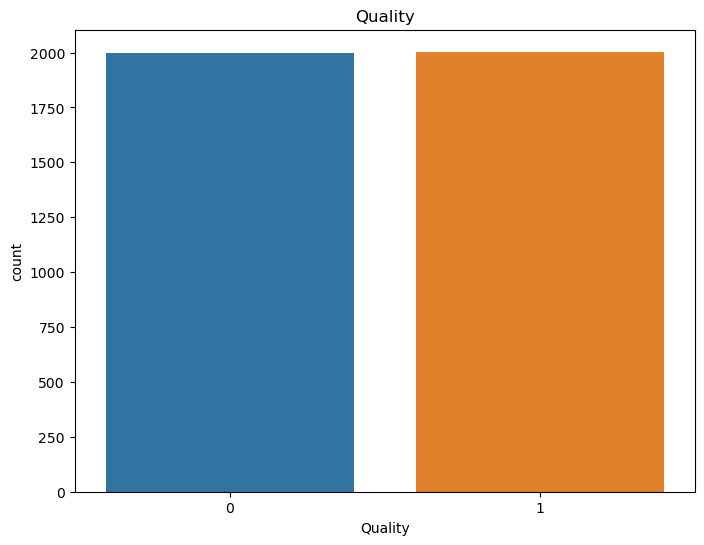

In [19]:
# Plot a countplot to visualize the distribution of the 'Quality' variable
plt.figure(figsize=(8,6))
sns.countplot(data=Data,x='Quality')
plt.title('Quality')
plt.show()


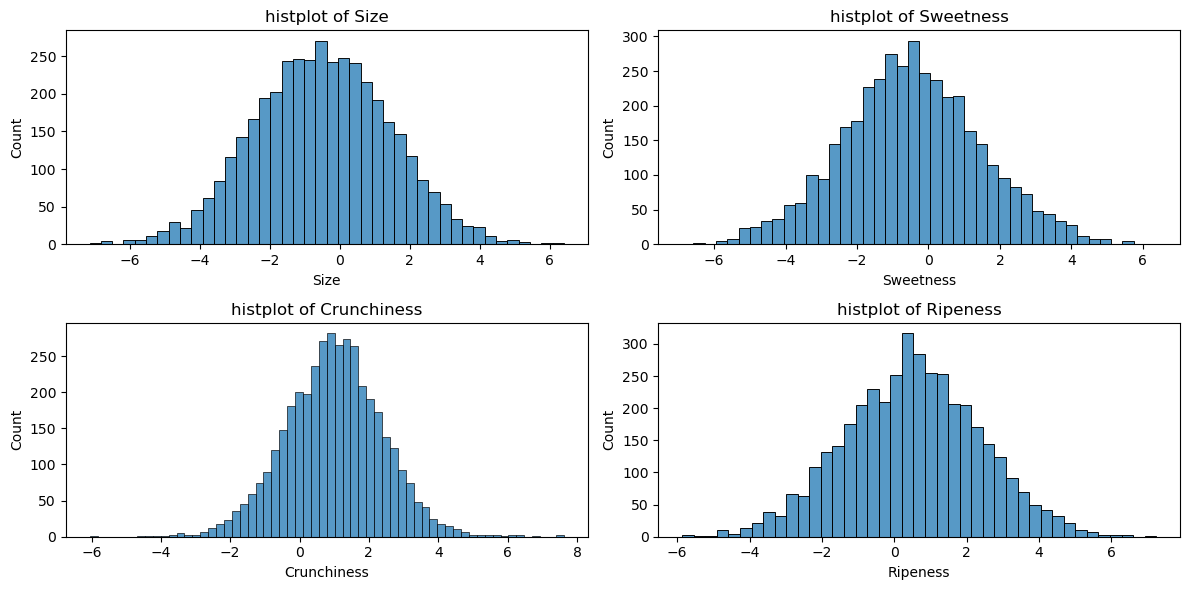

In [20]:
# Create histograms for various features to visualize their distributions
plt.figure(figsize=(12, 6))

# Histogram of 'Size'
plt.subplot(2, 2, 1)
sns.histplot(x=Data['Size'])
plt.title('histplot of Size')

# Histogram of 'Sweetness'
plt.subplot(2, 2, 2)
sns.histplot(x=Data['Sweetness'])
plt.title('histplot of Sweetness')

# Histogram of 'Crunchiness'
plt.subplot(2, 2, 3)
sns.histplot(x=Data['Crunchiness'])
plt.title('histplot of Crunchiness')

# Histogram of 'Ripeness'
plt.subplot(2, 2, 4)
sns.histplot(x=Data['Ripeness'])
plt.title('histplot of Ripeness')

plt.tight_layout()
plt.show()

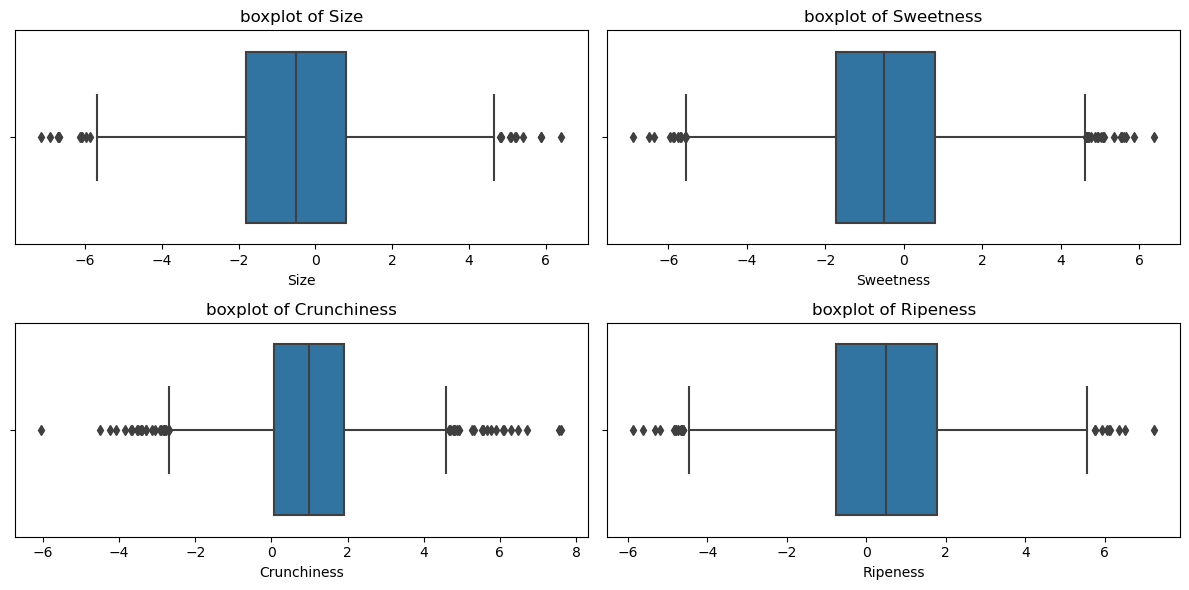

In [21]:
# Set up a figure with multiple subplots for histograms of different features
plt.figure(figsize=(12, 6))

# Plot histograms for 'Size', 'Sweetness', 'Crunchiness', and 'Ripeness' to observe their distributions
plt.subplot(2, 2, 1)
sns.boxplot(x=Data['Size'])
plt.title('boxplot of Size')

plt.subplot(2, 2, 2)
sns.boxplot(x=Data['Sweetness'])
plt.title('boxplot of Sweetness')

plt.subplot(2, 2, 3)
sns.boxplot(x=Data['Crunchiness'])
plt.title('boxplot of Crunchiness')

plt.subplot(2, 2, 4)
sns.boxplot(x=Data['Ripeness'])
plt.title('boxplot of Ripeness')

plt.tight_layout()
plt.show()

<Axes: >

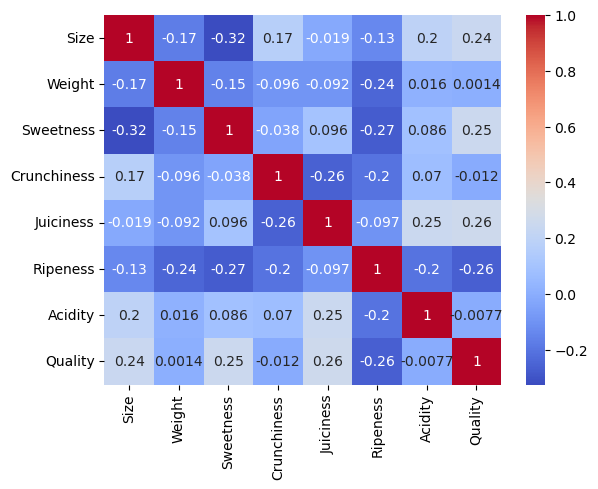

In [22]:
# Plot a heatmap to visualize the correlation matrix of the dataset
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')

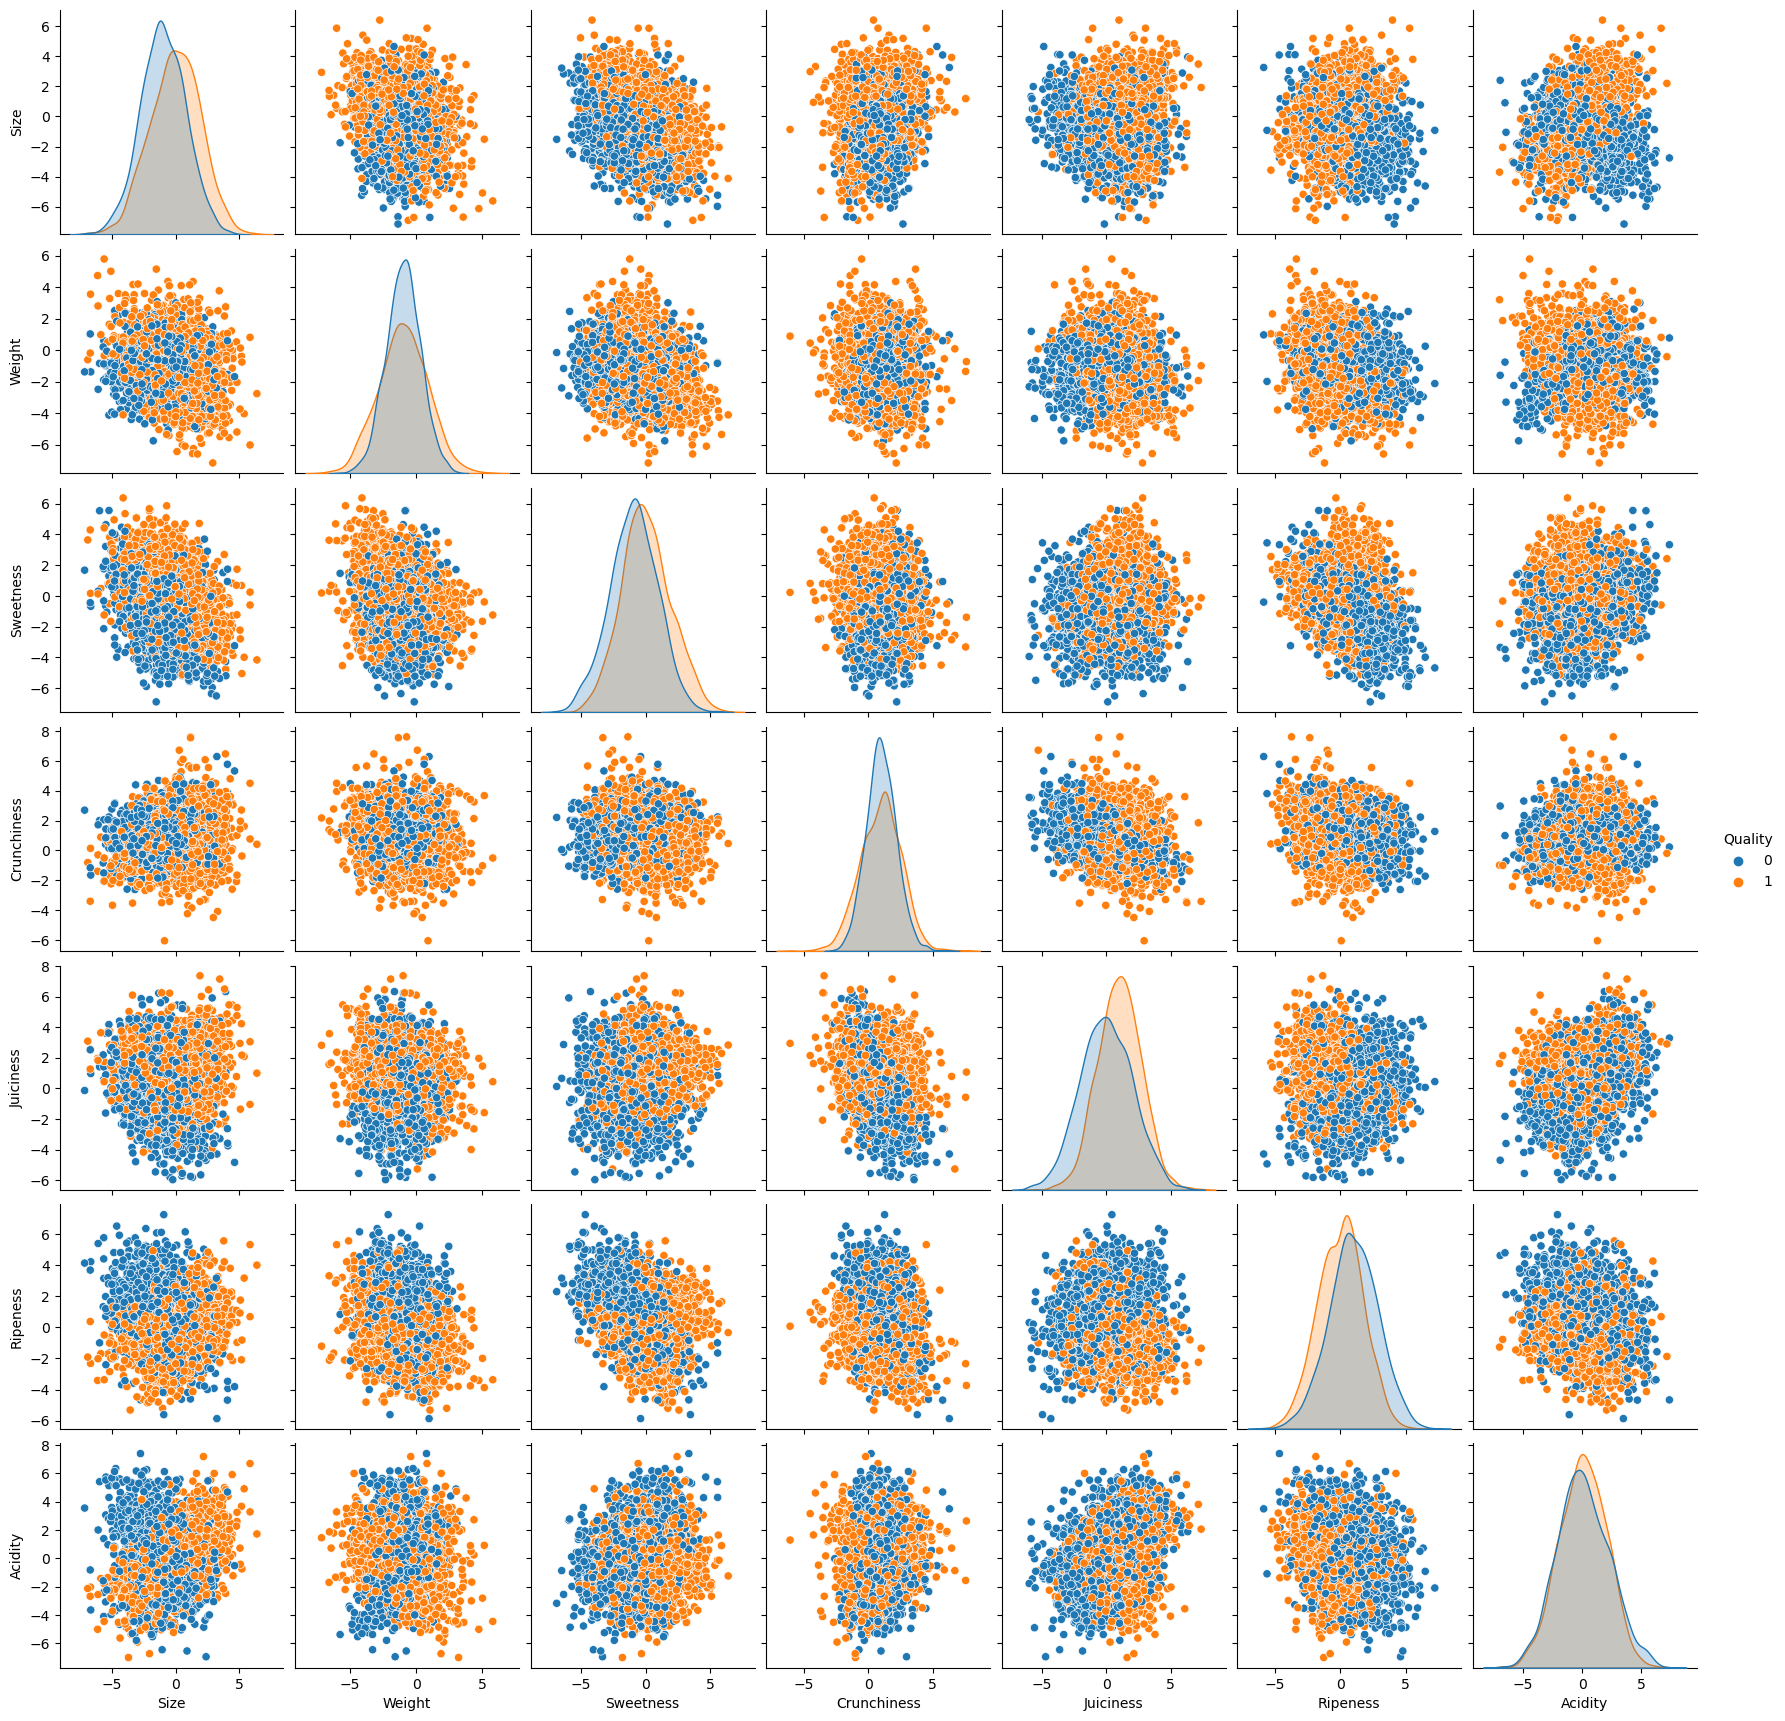

In [23]:
# Create pair plots to visualize relationships between all pairs of features with 'Quality' as hue
sns.pairplot(Data, hue='Quality')
plt.show()

In [24]:
# Define bounds for outliers using the interquartile range (IQR) method
filter_data=Data.iloc[:,[0,1,2,3,4,5,6]]
filter_data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [25]:
# Identify and remove outliers from the dataset
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

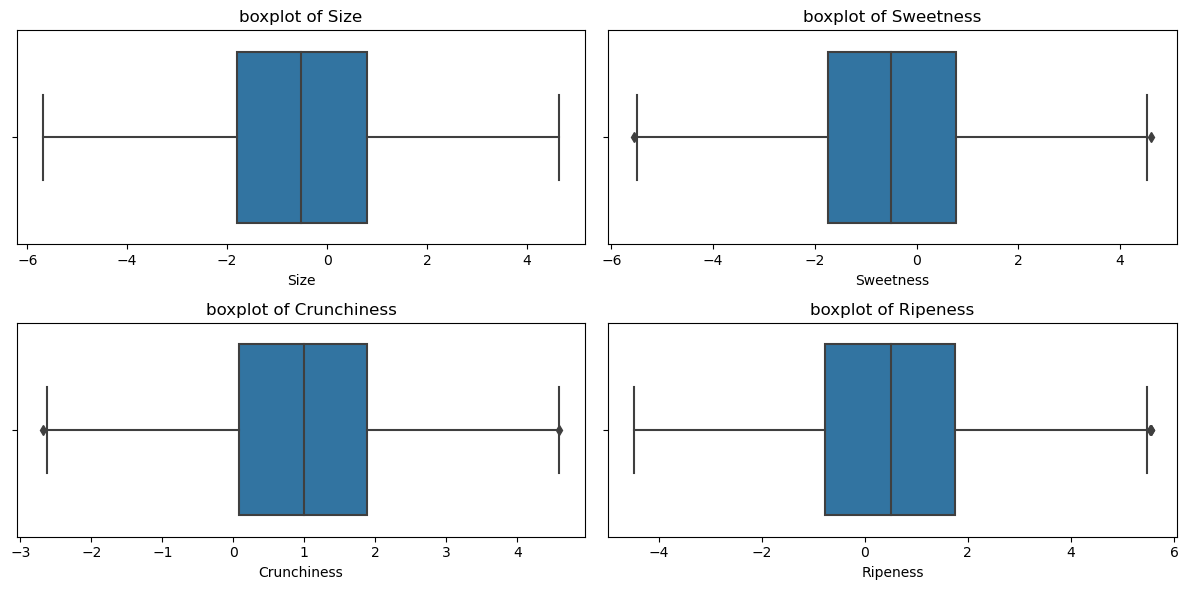

In [26]:
# Plot histograms for each feature again after removing outliers to observe the changes in distributions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=Data['Size'])
plt.title('boxplot of Size')

plt.subplot(2, 2, 2)
sns.boxplot(x=Data['Sweetness'])
plt.title('boxplot of Sweetness')

plt.subplot(2, 2, 3)
sns.boxplot(x=Data['Crunchiness'])
plt.title('boxplot of Crunchiness')

plt.subplot(2, 2, 4)
sns.boxplot(x=Data['Ripeness'])
plt.title('boxplot of Ripeness')

plt.tight_layout()
plt.show()

In [27]:
# Check for any remaining missing values in the dataset after outlier removal
Data.isnull().sum()

Size           22
Weight         54
Sweetness      32
Crunchiness    47
Juiciness      32
Ripeness       24
Acidity        20
Quality         0
dtype: int64

In [28]:
# Drop any remaining missing values in the dataset
Data.dropna(inplace= True)

In [29]:
# Selecting the first 7 columns as features (X) and the 8th column as the target variable (y)
x = Data.iloc[:,0:7]
y = Data.iloc[:,7:8]

In [30]:
# Displaying the first 5 rows of the features (X)
x.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523


In [31]:
# Displaying the first 5 rows of the target variable (y)
y.head()

,Quality
1,1
2,0
3,1
4,1
5,0


<Axes: >

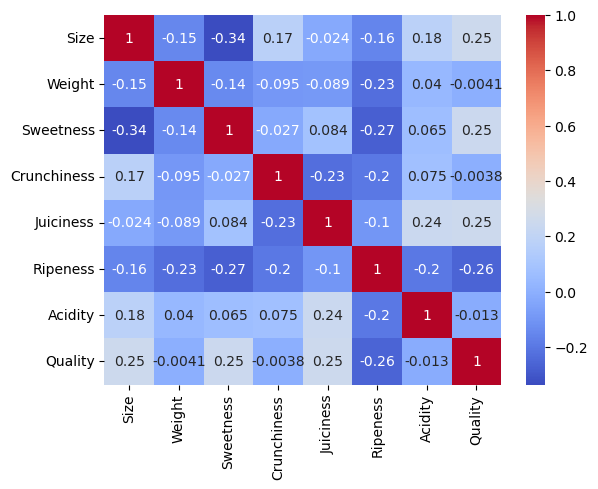

In [32]:
# Display the heatmap again to re-evaluate correlations after cleaning and outlier removal
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')

In [33]:
# Drop the 'Quality' column as it will be used as the target variable
X = Data.drop("Quality", axis = 1)
y = Data["Quality"]

In [34]:
# Splitting the dataset into training and testing sets
# 70% of the data will be used for training and 30% for testing
# random_state=0 ensures reproducibility of the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [35]:
# Standardizing the features by removing the mean and scaling to unit variance
# This improves the performance of some machine learning algorithmsfrom sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
# Initializing and training the Logistic Regression model
# The model will learn the relationship between the features in X_train and the target variable in y_train
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Making predictions on the test set using the trained Logistic Regression model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = LR.predict(X_test)

In [38]:
# Printing the model's accuracy on the test set 
print("Model Accuracy (using LR.score):", LR.score(X_test, y_test))


Model Accuracy (using LR.score): 0.741424802110818


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Initializing the Random Forest model
RF = RandomForestClassifier(random_state=0)

# Training the model on the training data
RF.fit(X_train, y_train)




RandomForestClassifier(random_state=0)

In [40]:
# Making predictions on the test set
y_pred_rf = RF.predict(X_test)

# Evaluating the model's performance
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.8883025505716798


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initializing the K-Nearest Neighbors model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model on the training data
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [42]:
# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model's performance
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Model Accuracy: 0.8935795954265612


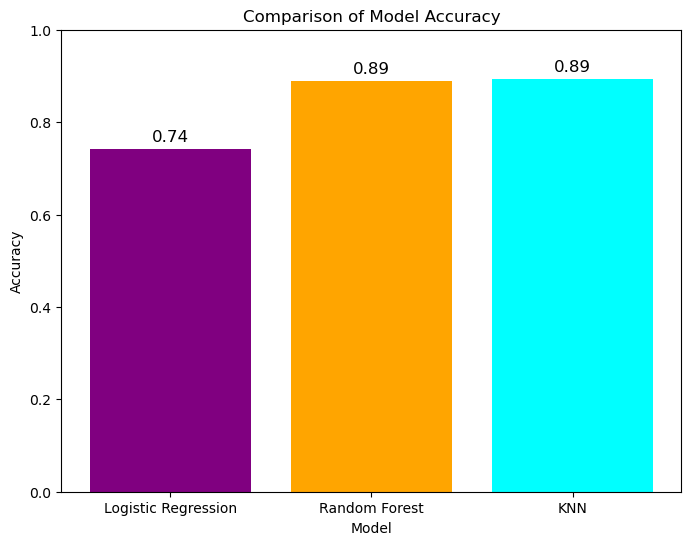

In [43]:
import matplotlib.pyplot as plt

# Assuming accuracies and model_names are already calculated
# For example:
model_names = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [0.741, 0.888, 0.893]  # Replace these with the actual accuracies of each model

# Plotting the accuracies with labels
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['purple', 'orange', 'cyan'])

# Adding labels to each bar with the accuracy values
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{accuracy:.2f}', 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
